<a href="https://colab.research.google.com/github/RonRichman/fastai_on_freMTPL/blob/master/fremtpl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install requirements and get the data into Pandas

In [1]:
!apt-get update
!apt-get install r-base
!pip install rpy2

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Get:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:8 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [135 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [27.2 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [300 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-b

In [2]:
! pip install tzlocal

  Running setup.py bdist_wheel for tzlocal ... - \ done
  Stored in directory: /root/.cache/pip/wheels/15/ae/df/a67bf1ed84e9bf230187d36d8dcfd30072bea0236cb059ed91
Successfully built tzlocal


In [3]:
  !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0    840      0 --:--:-- --:--:-- --:--:--   839
    100% |████████████████████████████████| 5.7MB 7.1MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x632b6000 @  0x7f052eb8e2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
Cloning into 'course-v3'...
remote: Enumerating objects: 2760, done.
remote: Total 2760 (delta 0), re

In [4]:
! wget http://cas.uqam.ca/pub/R/bin/windows/contrib/3.2/CASdatasets_1.0-6.zip

--2019-01-01 04:09:22--  http://cas.uqam.ca/pub/R/bin/windows/contrib/3.2/CASdatasets_1.0-6.zip
Resolving cas.uqam.ca (cas.uqam.ca)... 132.208.138.146
Connecting to cas.uqam.ca (cas.uqam.ca)|132.208.138.146|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99795419 (95M) [application/zip]
Saving to: ‘CASdatasets_1.0-6.zip’

CASdatasets_1.0-6.z 100%[===================>]  95.17M  5.44MB/s    in 20s     

2019-01-01 04:09:43 (4.81 MB/s) - ‘CASdatasets_1.0-6.zip’ saved [99795419/99795419]



In [0]:
import zipfile
with zipfile.ZipFile('CASdatasets_1.0-6.zip', 'r') as zip_ref:
    zip_ref.extractall()
    

In [6]:
! ls

CASdatasets  CASdatasets_1.0-6.zip  course-v3  data  models


In [7]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
pandas2ri.activate()

! ls CASdatasets//data//freMTPL2freq.rda	

CASdatasets//data//freMTPL2freq.rda


In [8]:
base = importr('base')
base.load('.//CASdatasets//data//freMTPL2freq.rda')    
rdf_List = base.mget(base.ls())

# ITERATE THROUGH LIST OF R DFs 
pydf_dict = {}

for i,f in enumerate(base.names(rdf_List)):
    pydf_dict[f] = pandas2ri.ri2py_dataframe(rdf_List[i])

for k,v in pydf_dict.items():
    print(v.head())

   IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0    1.0      1.0      0.10    D         5       0       55          50   
1    3.0      1.0      0.77    D         5       0       55          50   
2    5.0      1.0      0.75    B         6       2       52          50   
3   10.0      1.0      0.09    B         7       0       46          50   
4   11.0      1.0      0.84    B         7       0       46          50   

  VehBrand   VehGas  Density Region  
0      B12  Regular     1217    R82  
1      B12  Regular     1217    R82  
2      B12   Diesel       54    R22  
3      B12   Diesel       76    R72  
4      B12   Diesel       76    R72  


In [0]:
freMTPL2freq = pydf_dict['freMTPL2freq'].copy()

# Run the Fast.AI Tabular Learner

In [13]:
freMTPL2freq.head(5)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1.0,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1.0,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1.0,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1.0,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [0]:
import numpy as np

freMTPL2freq['id'] = freMTPL2freq.index + 1
freMTPL2freq['Density'] = np.log(freMTPL2freq.Density)
freMTPL2freq.loc[ freMTPL2freq['ClaimNb'] > 4.0, 'ClaimNb' ] = 4.0
freMTPL2freq.loc[ freMTPL2freq['Exposure'] > 1.0, 'Exposure' ] = 1


In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(freMTPL2freq,test_size = .05)
train_idx, validation_idx = train_test_split(train['id'],test_size = .05)

# Show validation set
freMTPL2freq[freMTPL2freq.id.isin(validation_idx)].head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,id
8,18.0,1.0,0.71,C,7,0,33,68,B12,Diesel,4.919981,R91,9
34,72.0,1.0,0.39,D,4,0,23,85,B12,Regular,6.278521,R93,35
59,121.0,1.0,0.05,C,6,0,37,55,B12,Diesel,5.713733,R11,60
78,161.0,1.0,0.81,E,5,0,53,50,B12,Regular,8.140316,R93,79
224,465.0,1.0,0.79,E,10,3,40,50,B12,Regular,8.635509,R11,225


In [0]:
cats = ['Area', 'VehPower', 'VehBrand', 'VehGas', 'Region']
cont = ['VehAge', 'DrivAge', 'BonusMalus', 'Density', 'Exposure']
dep_var = 'ClaimNb'

In [0]:
from fastai.tabular import *

procs=[Categorify, Normalize]

path = Path('')

In [18]:
data = (TabularList.from_df(freMTPL2freq, path=path, cat_names=cats, cont_names=cont, procs=procs)
                   .split_by_idx(validation_idx)
                   .label_from_df(cols=dep_var, label_cls=FloatList, log=False)
                   .databunch(bs=256))

data

TabularDataBunch;

Train: LabelList
y: FloatList (645807 items)
[FloatItem 1.0, FloatItem 1.0, FloatItem 1.0, FloatItem 1.0, FloatItem 1.0]...
Path: .
x: TabularList (645807 items)
[TabularLine Area D; VehPower 5; VehBrand B12; VehGas Regular; Region R82; VehAge -1.2432; DrivAge 0.6726; BonusMalus -0.6244; Density 0.5998; Exposure -1.1768; , TabularLine Area D; VehPower 5; VehBrand B12; VehGas Regular; Region R82; VehAge -1.2432; DrivAge 0.6726; BonusMalus -0.6244; Density 0.5998; Exposure 0.6634; , TabularLine Area B; VehPower 6; VehBrand B12; VehGas Diesel; Region R22; VehAge -0.8903; DrivAge 0.4603; BonusMalus -0.6244; Density -1.0659; Exposure 0.6085; , TabularLine Area B; VehPower 7; VehBrand B12; VehGas Diesel; Region R72; VehAge -1.2432; DrivAge 0.0358; BonusMalus -0.6244; Density -0.8832; Exposure -1.2043; , TabularLine Area B; VehPower 7; VehBrand B12; VehGas Diesel; Region R72; VehAge -1.2432; DrivAge 0.0358; BonusMalus -0.6244; Density -0.8832; Exposure 0.8557; ]...
Path: .;

In [0]:
def poisson_dev(pred:Tensor, targ:Tensor)->Rank0Tensor:
    "Poisson deviance between `pred` and `targ`."
    eps = 10e-4
    return 2*torch.mean(pred - targ - targ*(torch.log(torch.clamp(pred,min = eps))-torch.log(torch.clamp(targ,min = eps))))

In [20]:
max_y = np.max(train['ClaimNb'])*1
print(max_y)
y_range = torch.tensor([0, max_y], device=defaults.device)

4.0


In [0]:
learn = tabular_learner(data,emb_szs={'Area':2, 'VehPower':2, 'VehBrand':5, 'VehGas':1, 'Region':5},
                        layers=[32,32], ps=[0.05,0.05], emb_drop=0,
                      metrics=poisson_dev,y_range=y_range, wd=0)


In [77]:
learn.layer_groups[0]


Sequential(
  (0): Embedding(7, 2)
  (1): Embedding(13, 2)
  (2): Embedding(12, 5)
  (3): Embedding(3, 1)
  (4): Embedding(23, 5)
  (5): Dropout(p=0)
  (6): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Linear(in_features=20, out_features=32, bias=True)
  (8): ReLU(inplace)
  (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Dropout(p=0.05)
  (11): Linear(in_features=32, out_features=32, bias=True)
  (12): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): Dropout(p=0.05)
  (14): Linear(in_features=32, out_features=1, bias=True)
)

In [78]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(7, 2)
    (1): Embedding(13, 2)
    (2): Embedding(12, 5)
    (3): Embedding(3, 1)
    (4): Embedding(23, 5)
  )
  (emb_drop): Dropout(p=0)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=32, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.05)
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.05)
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [79]:
learn.loss_func

Since the default loss function is a modified MSE, we need to set this to the Poisson loss

In [0]:
learn.loss_func = poisson_dev

In [81]:
learn.lr_find(stop_div=False)

epoch,train_loss,valid_loss,poisson_dev


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


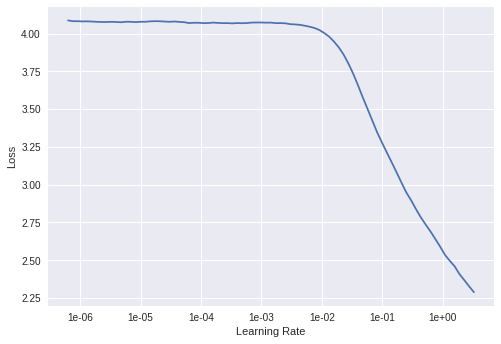

In [82]:
learn.recorder.plot()

In [83]:
learn.fit_one_cycle(2, (1e-2))

epoch,train_loss,valid_loss,poisson_dev
1,0.327328,0.314082,0.314082


KeyboardInterrupt: ignored

In [56]:
learn.lr_find()

epoch,train_loss,valid_loss,poisson_dev


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


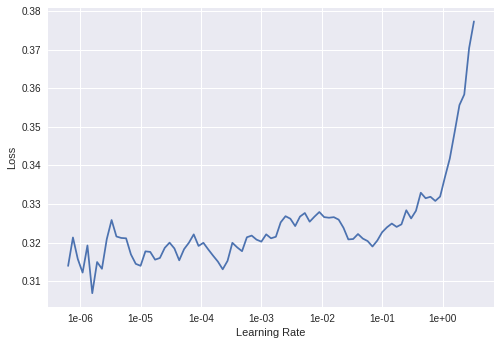

In [57]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(2, slice(1e-4))

epoch,train_loss,valid_loss,poisson_dev
1,0.317366,0.313336,0.313336
2,0.325065,0.313574,0.313574
